In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('mental_health_dataset.csv')

In [5]:
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [6]:
df.tail()

,posts,predicted,intensity
10387,hey everyone I am a 25 year old male I work ou...,negative,-1
10388,have surgery for stage 1 colon cancer 1 year a...,very negative,-2
10389,the doctor advise we he could not remove the a...,neutral,0
10390,my 66 year old father have been through so muc...,neutral,0
10391,I have bein have a bloody stool since last yea...,negative,-1


In [7]:
df.shape

(10392, 3)

In [8]:
df.columns

Index(['posts', 'predicted', 'intensity'], dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

posts        1
predicted    0
intensity    0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0
...,...,...,...
10387,hey everyone I am a 25 year old male I work ou...,negative,-1
10388,have surgery for stage 1 colon cancer 1 year a...,very negative,-2
10389,the doctor advise we he could not remove the a...,neutral,0
10390,my 66 year old father have been through so muc...,neutral,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10391 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10391 non-null  object
 2   intensity  10391 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 324.7+ KB


In [14]:
df.nunique()

posts        10391
predicted        4
intensity        4
dtype: int64

In [15]:
df['predicted'].unique()

array(['negative', 'neutral', 'positive', 'very negative'], dtype=object)

In [16]:
df['predicted'].value_counts()

neutral          4374
negative         4112
very negative    1155
positive          750
Name: predicted, dtype: int64

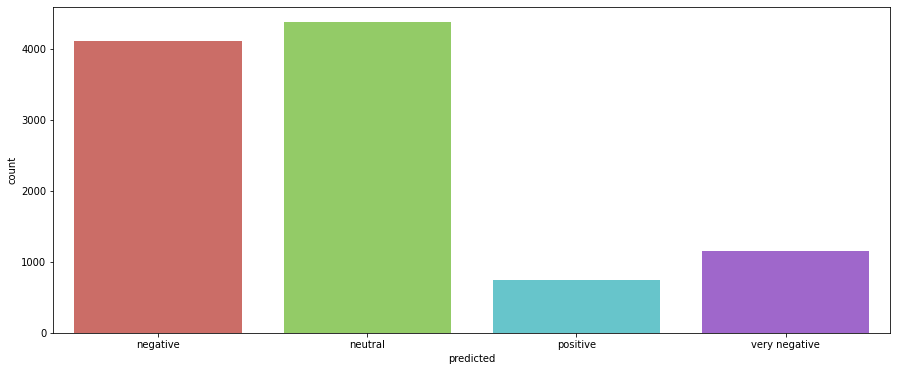

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(df['predicted'], data = df, palette = 'hls')
plt.show()

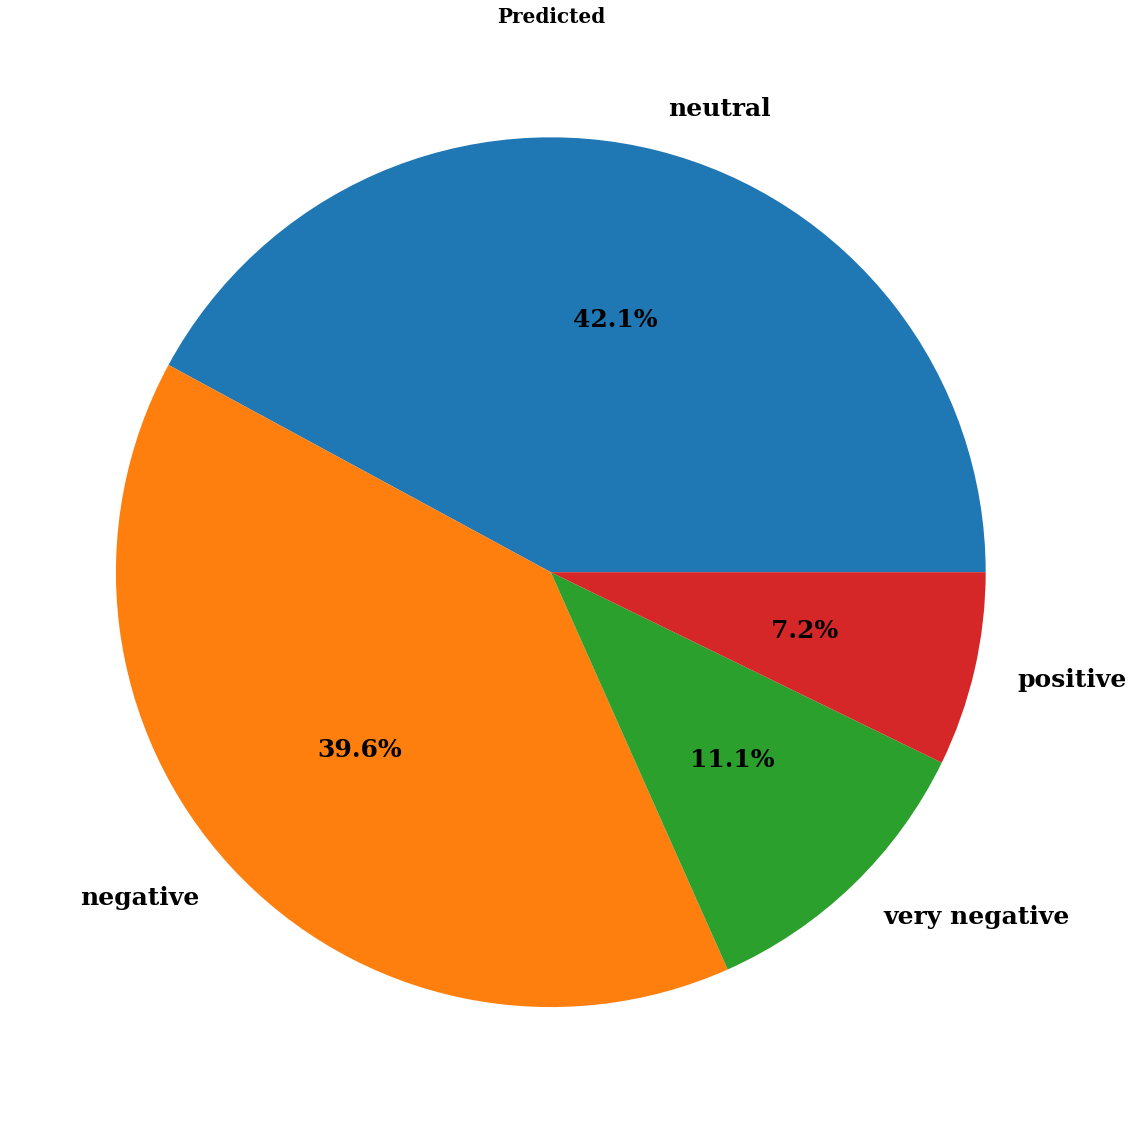

In [18]:
plt.figure(figsize=(30,20)) 
plt.pie(df['predicted'].value_counts(), labels=df['predicted'].value_counts().index, 
        autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                       'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Predicted', size=20, **hfont) 
plt.show()

In [19]:
df['intensity'].unique()

array([-1,  0,  1, -2], dtype=int64)

In [20]:
df['intensity'].value_counts()

 0    4374
-1    4112
-2    1155
 1     750
Name: intensity, dtype: int64

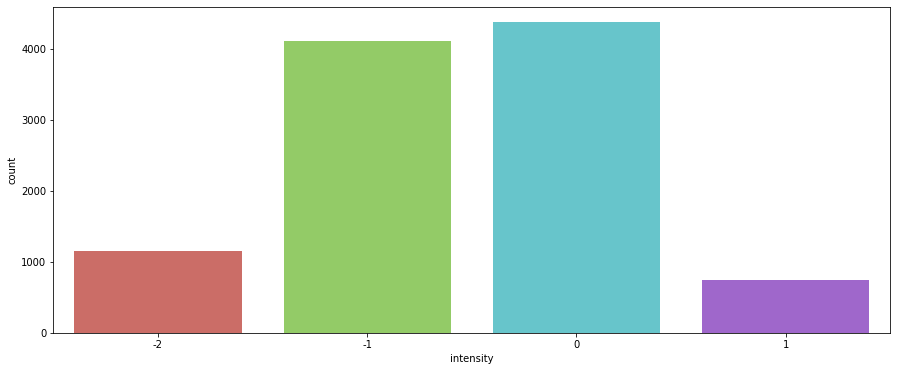

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(df['intensity'], data = df, palette = 'hls')
plt.show()

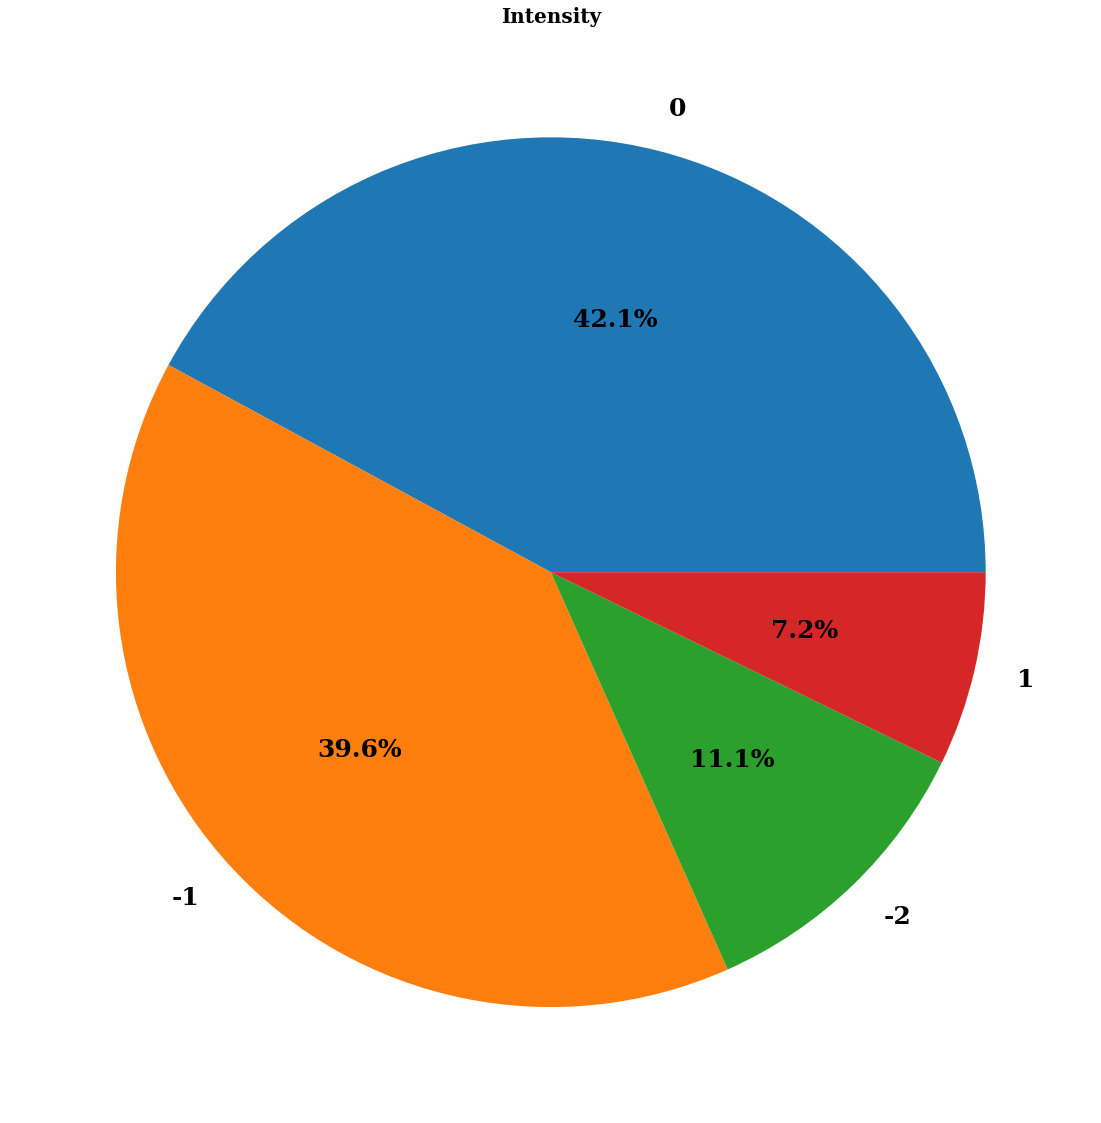

In [22]:
plt.figure(figsize=(30,20)) 
plt.pie(df['intensity'].value_counts(), labels=df['intensity'].value_counts().index, 
        autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                       'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Intensity', size=20, **hfont) 
plt.show()

In [23]:
df_new = df.copy()

In [24]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [25]:
df_new['posts'] = df_new['posts'].apply(lambda x: clean_text(x))

In [26]:
df_new['posts']

0        i know as parent of child with down syndrome t...
1        but in my heart i know this is the future prom...
2        i have mylefibrosis which turn to leukemia the...
3        from one of my health group subject wayne dyer...
4        gmos now link to leukemia http nsnbc i 2013 07...
                               ...                        
10387    hey everyone i am a 25 year old male i work ou...
10388    have surgery for stage 1 colon cancer 1 year a...
10389    the doctor advise we he could not remove the a...
10390    my 66 year old father have been through so muc...
10391    i have bein have a bloody stool since last yea...
Name: posts, Length: 10391, dtype: object

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [29]:
df_new['posts']= df_new['posts'].apply(lambda x:remove_punctuation(x))

In [30]:
df_new['posts']

0        i know as parent of child with down syndrome t...
1        but in my heart i know this is the future prom...
2        i have mylefibrosis which turn to leukemia the...
3        from one of my health group subject wayne dyer...
4        gmos now link to leukemia http nsnbc i 2013 07...
                               ...                        
10387    hey everyone i am a 25 year old male i work ou...
10388    have surgery for stage 1 colon cancer 1 year a...
10389    the doctor advise we he could not remove the a...
10390    my 66 year old father have been through so muc...
10391    i have bein have a bloody stool since last yea...
Name: posts, Length: 10391, dtype: object

In [31]:
import re

In [32]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [33]:
df_new['posts']= df_new['posts'].apply(lambda x: tokenization(x))

In [34]:
df_new['posts']

0        [i know as parent of child with down syndrome ...
1        [but in my heart i know this is the future pro...
2        [i have mylefibrosis which turn to leukemia th...
3        [from one of my health group subject wayne dye...
4        [gmos now link to leukemia http nsnbc i 2013 0...
                               ...                        
10387    [hey everyone i am a 25 year old male i work o...
10388    [have surgery for stage 1 colon cancer 1 year ...
10389    [the doctor advise we he could not remove the ...
10390    [my 66 year old father have been through so mu...
10391    [i have bein have a bloody stool since last ye...
Name: posts, Length: 10391, dtype: object

In [35]:
import nltk
from wordcloud import WordCloud

In [36]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
stopwords = nltk.corpus.stopwords.words('english')

In [41]:
def remove_stopwords(text):
    output = " ".join(word for word in text.split() if word.lower() not in stopwords)
    return output

In [42]:
df_new['posts']= df_new['posts'].apply(lambda x:remove_stopwords(x))

In [43]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc 2013 07 17 gmo l...
                               ...                        
10387    hey everyone 25 year old male work eat pretty ...
10388    surgery stage 1 colon cancer 1 year ago cea le...
10389    doctor advise could remove abnormal polyp chri...
10390    66 year old father much past year really need ...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [44]:
from nltk.stem import WordNetLemmatizer

In [45]:
wordnet_lemmatizer = WordNetLemmatizer()

In [46]:
def lemmatizer(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_text

In [47]:
df_new['posts']=df_new['posts'].apply(lambda x:lemmatizer(x))

In [48]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc 2013 07 17 gmo l...
                               ...                        
10387    hey everyone 25 year old male work eat pretty ...
10388    surgery stage 1 colon cancer 1 year ago cea le...
10389    doctor advise could remove abnormal polyp chri...
10390    66 year old father much past year really need ...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [49]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [50]:
df_new['posts'] = df_new['posts'].apply(lambda x: clean_text(x))

In [51]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc gmo link leukemi...
                               ...                        
10387    hey everyone year old male work eat pretty hea...
10388    surgery stage colon cancer year ago cea level ...
10389    doctor advise could remove abnormal polyp chri...
10390    year old father much past year really need try...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [52]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [53]:
df_new['posts'] = df_new['posts'].apply(lambda x: remove_urls(x))

In [54]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc gmo link leukemi...
                               ...                        
10387    hey everyone year old male work eat pretty hea...
10388    surgery stage colon cancer year ago cea level ...
10389    doctor advise could remove abnormal polyp chri...
10390    year old father much past year really need try...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [55]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [56]:
df_new['posts'] = df_new['posts'].apply(lambda x: remove_digits(x))

In [57]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc gmo link leukemi...
                               ...                        
10387    hey everyone year old male work eat pretty hea...
10388    surgery stage colon cancer year ago cea level ...
10389    doctor advise could remove abnormal polyp chri...
10390    year old father much past year really need try...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [58]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [59]:
df_new['posts'] = df_new['posts'].apply(lambda x: remove_emojis(x))

In [60]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc gmo link leukemi...
                               ...                        
10387    hey everyone year old male work eat pretty hea...
10388    surgery stage colon cancer year ago cea level ...
10389    doctor advise could remove abnormal polyp chri...
10390    year old father much past year really need try...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [61]:
df_new['posts'] = df_new['posts'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [62]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc gmo link leukemi...
                               ...                        
10387    hey everyone year old male work eat pretty hea...
10388    surgery stage colon cancer year ago cea level ...
10389    doctor advise could remove abnormal polyp chri...
10390    year old father much past year really need try...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [63]:
df_new['posts'] = df_new['posts'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [64]:
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc gmo link leukemi...
                               ...                        
10387    hey everyone year old male work eat pretty hea...
10388    surgery stage colon cancer year ago cea level ...
10389    doctor advise could remove abnormal polyp chri...
10390    year old father much past year really need try...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [65]:
df_new

,posts,predicted,intensity
0,know parent child syndrome hear child high ris...,negative,-1
1,heart know future promise article regardless h...,neutral,0
2,mylefibrosis turn leukemia want stem cell tran...,negative,-1
3,one health group subject wayne dyer leukemia c...,neutral,0
4,gmos link leukemia http nsnbc gmo link leukemi...,neutral,0
...,...,...,...
10387,hey everyone year old male work eat pretty hea...,negative,-1
10388,surgery stage colon cancer year ago cea level ...,very negative,-2
10389,doctor advise could remove abnormal polyp chri...,neutral,0
10390,year old father much past year really need try...,neutral,0


In [66]:
df1 = df_new[['predicted', 'posts']]

In [67]:
df1.to_csv('mental_health_sentiment_analysis.csv')

In [68]:
df1

,predicted,posts
0,negative,know parent child syndrome hear child high ris...
1,neutral,heart know future promise article regardless h...
2,negative,mylefibrosis turn leukemia want stem cell tran...
3,neutral,one health group subject wayne dyer leukemia c...
4,neutral,gmos link leukemia http nsnbc gmo link leukemi...
...,...,...
10387,negative,hey everyone year old male work eat pretty hea...
10388,very negative,surgery stage colon cancer year ago cea level ...
10389,neutral,doctor advise could remove abnormal polyp chri...
10390,neutral,year old father much past year really need try...


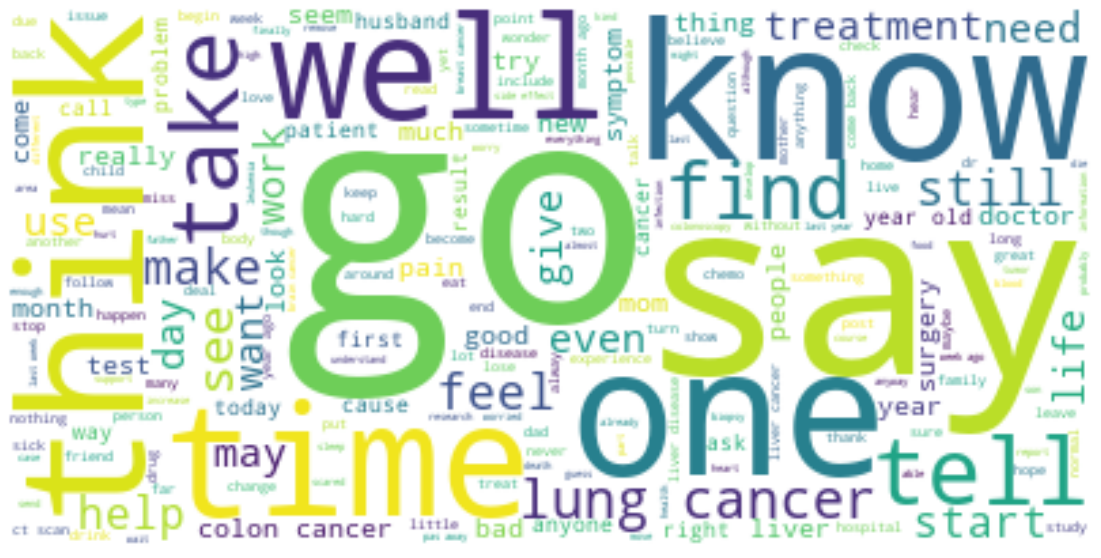

In [71]:
text_data = ' '.join(df_new['posts'])
wordcloud = WordCloud(background_color='white').generate(text_data)
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.show()